#  Air passenger satisfaction




## 1. Introduction:

### Context

This kernel contains an exploration of the relationship between air passenger satisfaction and various factors from ticket purchase to arrival at the destination.

Dataset sourse: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

### Content

__The dataset contains the following columns:__

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 2. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy import stats

%matplotlib inline


plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv('train.csv')
df.shape

(103904, 25)

## 3. First look at the data

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


There are two columns in the dataset, such as "Unnamed:0" and "id", that don't contain useful information, so we can drop them.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

Let's check the dataset for null values:

In [5]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Just one column "Arrival Delay in Minutes" contains nulls, however, this feature should strongly correlate with "Departure Delay in Minutes", because the aircraft usually spends the same time flying on the same route, as far as I know. We'll check this out later.


## 4. Exploratory Data Analysis

### Target

In [6]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

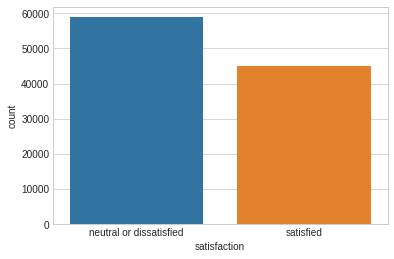

In [7]:
sns.countplot(x='satisfaction',data=df);

As we can see, there are more dissatisfied passengers than satisfied ones.

### Categorical features

We have four categorical features, such as "Gender", "Customer Type", "Type of Travel" and "Class".

__(!)__ I DON'T THINK the features such "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Check-in service", "Inflight service", "Cleanliness" ARE CATEGORICAL due to we can compare them with each other (for example, level 5 of wifi service satisfaction is better, then level 1) 



Let's look at the target distribution depending on categorical features:

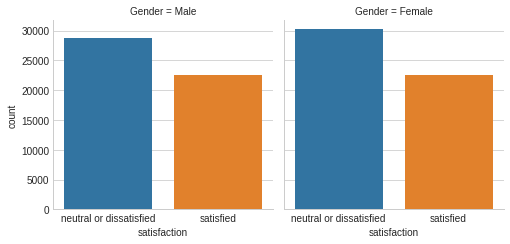

In [8]:
sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.0); 

The target distributions are the same approximately... 

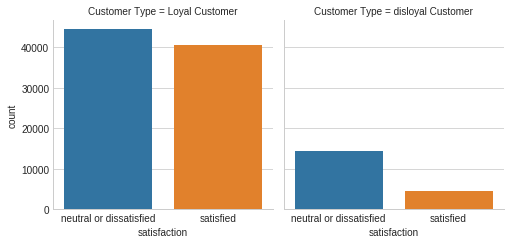

In [9]:
sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.0); 

There are more neutral or dissatisfied among disloyal, but I'm not sure what loyalty means here so I can't try to explain this distribution... 

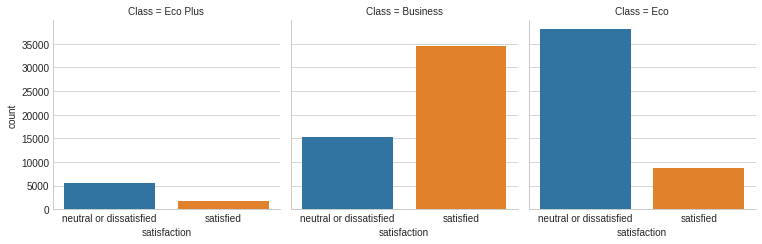

In [10]:
sns.catplot("satisfaction", col="Class", col_wrap=3, data=df, kind="count", height=3.5, aspect=1.0); 

This picture is already quite common (Business class has the most number of satisfied).  

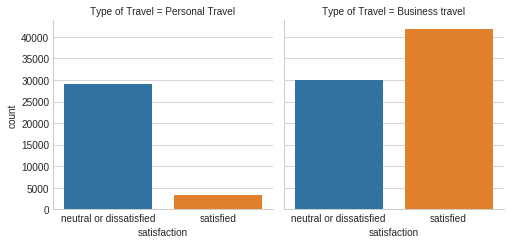

In [11]:
sns.catplot("satisfaction", col="Type of Travel", col_wrap=2, data=df, kind="count", height=3.5, aspect=1.0); 

These plots are very interesting, they show that people don't like spend their own money on flights:)
Usually travel expenses are paid by the employer and as a result most passengers are satisfied with the flight.

By the way, it's a pity that there is no information about buying tickets in the dataset. I think information about discounts and sales would correlate well with the target and other features.

### Numerical features

In [12]:
num_features = df.columns.drop(["Gender", "Customer Type", "Class", "Type of Travel", "satisfaction"])
num_features

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

Let's look at the coorelation matrix of numerical features and test the hypothesis of a relationship between "Arrival Delay in Minutes" and "Departure Delay in Minutes": 

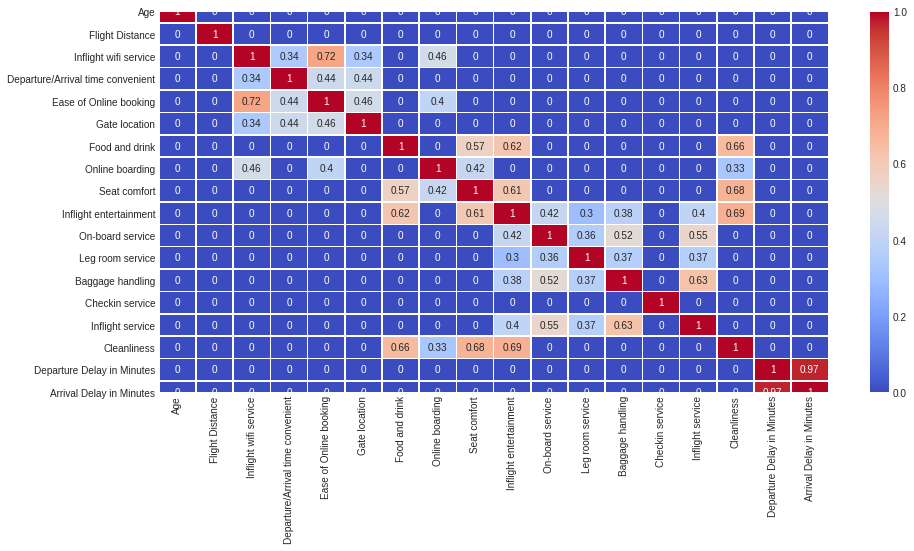

In [13]:
corr_matrix = df[num_features].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');


In [14]:
#sns.pairplot(df['Cleanliness', 'Food and drink', 'Seat comfort' ,'Inflight entertainment'], size = 2.5)
#plt.show();

As we previously assumed, "Departure Delay in Minutes" and "Arrival Delay in Minutes" are strongly correlated, so we can drop one of them.

In [15]:
df = df.drop('Arrival Delay in Minutes', axis=1)

__Flight distance__

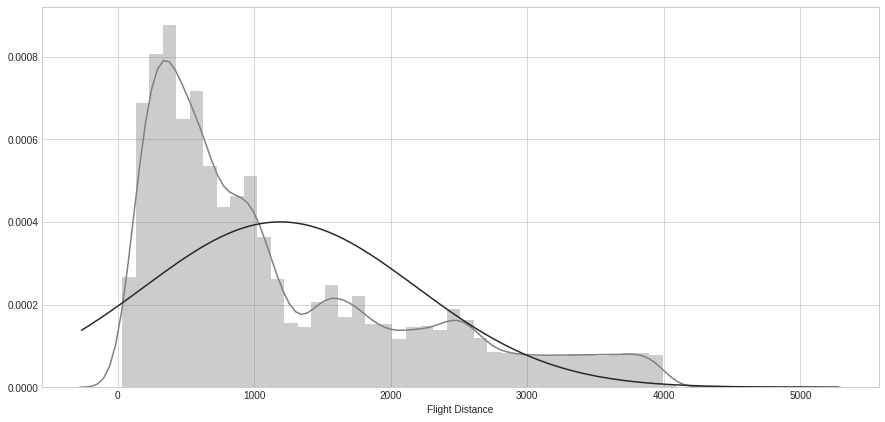

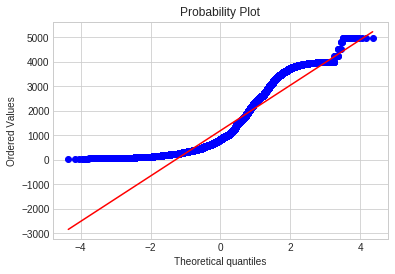

In [16]:
plt.figure(figsize = (15, 7))
sns.distplot(df['Flight Distance'], fit=norm, color='grey');
fig = plt.figure()
res = stats.probplot(df['Flight Distance'], plot=plt)

The distribution doesn't look much like normal

_Satisfaction + Flight Distance_

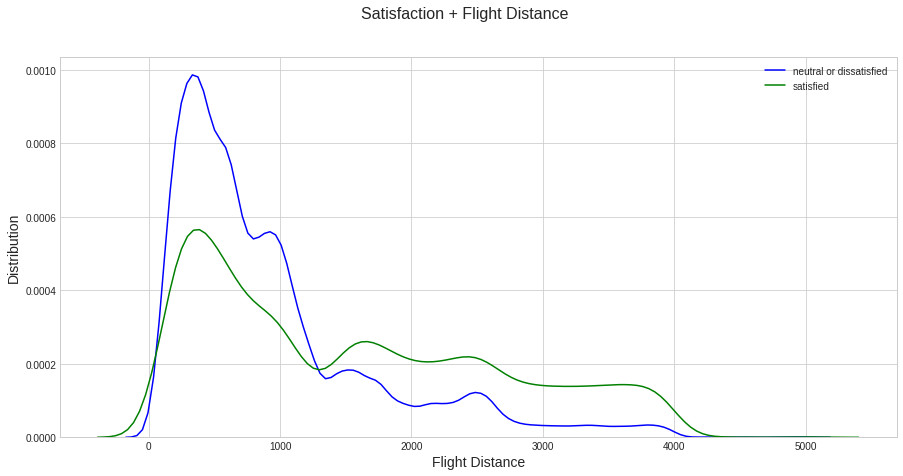

In [17]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'Flight Distance'], label="neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'satisfied', 'Flight Distance'], label="satisfied", color='green');
fig.figure.suptitle("Satisfaction + Flight Distance", fontsize = 16);
plt.xlabel('Flight Distance', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

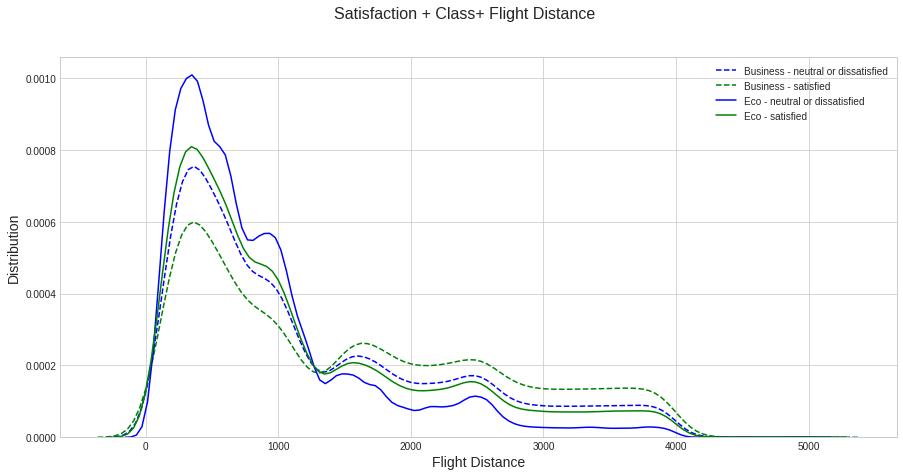

In [18]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Class'] == 'Business') , 'Flight Distance'], label="Business - neutral or dissatisfied", color='blue', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Class'] == 'Business'), 'Flight Distance'], label="Business - satisfied", color='green', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Class'] != 'Business') , 'Flight Distance'], label="Eco - neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Class'] != 'Business'), 'Flight Distance'], label="Eco - satisfied" , color='green');
fig.figure.suptitle("Satisfaction + Class+ Flight Distance", fontsize = 16);
plt.xlabel('Flight Distance', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

The distribution of satisfied passengers is more even in both classes

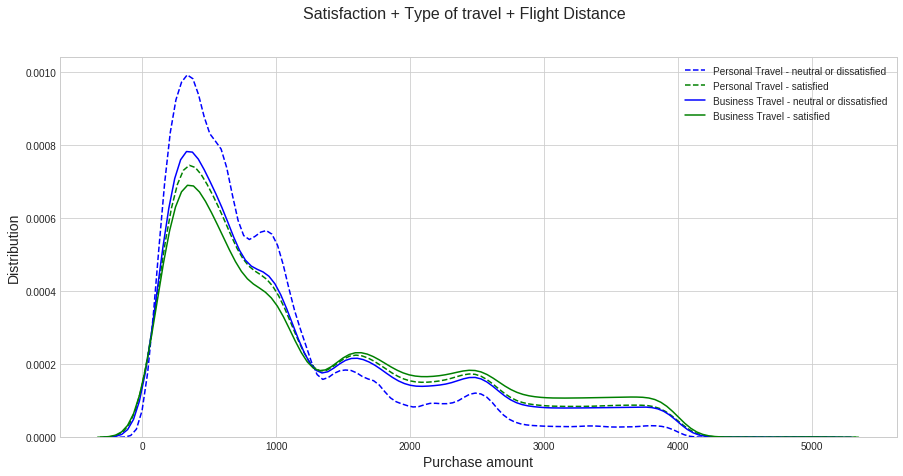

In [19]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Type of Travel'] == 'Personal Travel') , 'Flight Distance'], label="Personal Travel - neutral or dissatisfied", color='blue', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Type of Travel'] == 'Personal Travel'), 'Flight Distance'], label="Personal Travel - satisfied", color='green', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Type of Travel'] != 'Personal Travel') , 'Flight Distance'], label="Business Travel - neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Type of Travel'] != 'Personal Travel'), 'Flight Distance'], label="Business Travel - satisfied" , color='green');
fig.figure.suptitle("Satisfaction + Type of travel + Flight Distance", fontsize = 16)
plt.xlabel('Purchase amount', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

The distribution of dissatisfied passengers in a Personal Travel differs from all others

__Age__

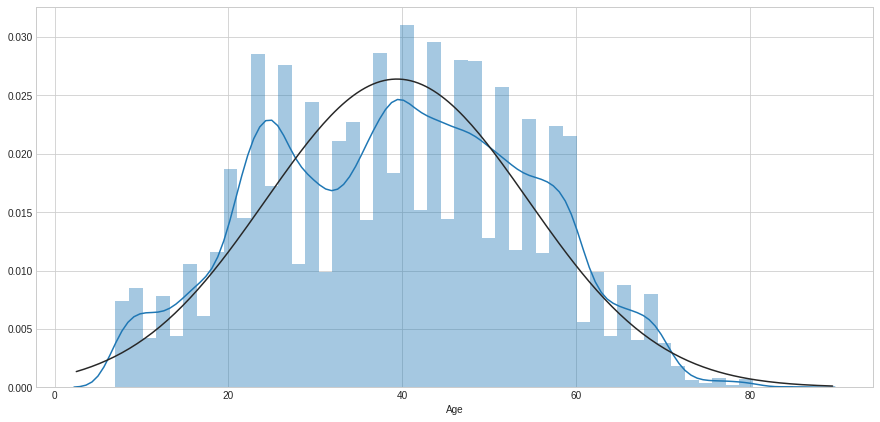

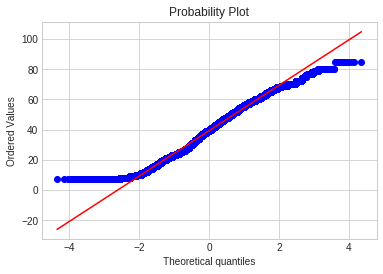

In [20]:
plt.figure(figsize = (15, 7))
sns.distplot(df['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)

And the age distribution is quite normal

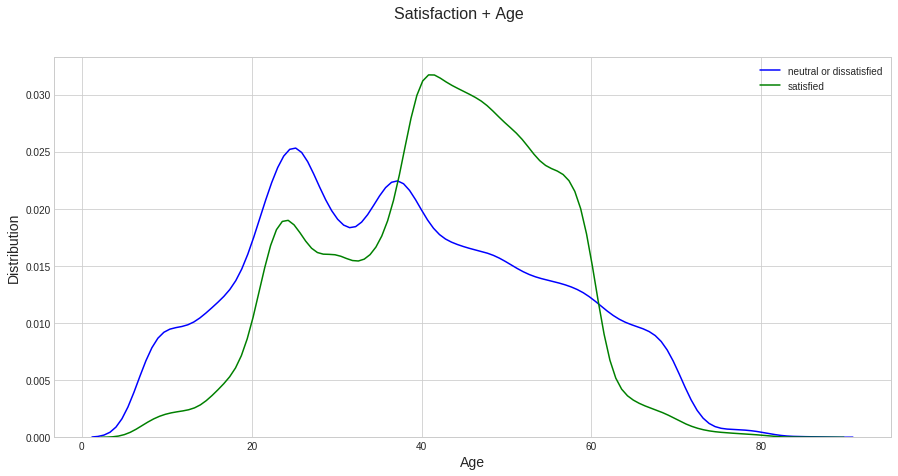

In [21]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'Age'], label="neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'satisfied', 'Age'], label="satisfied", color='green');
fig.figure.suptitle("Satisfaction + Age", fontsize = 16);
plt.xlabel('Age', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

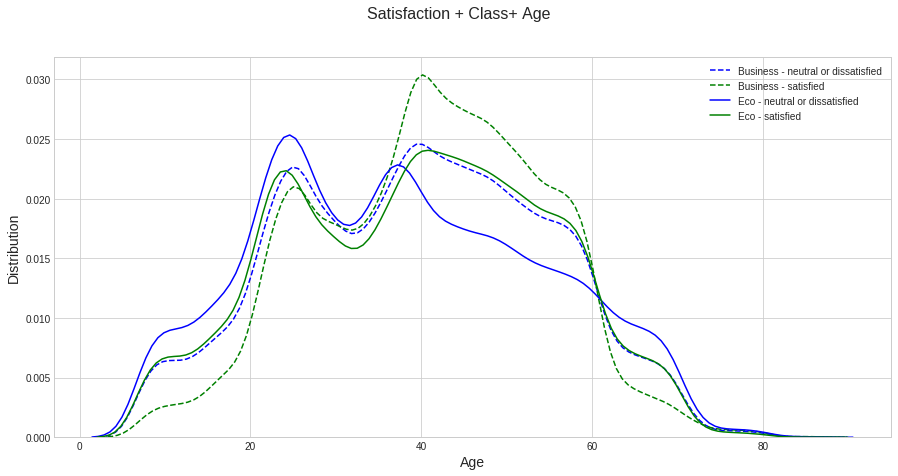

In [22]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Class'] == 'Business') , 'Age'], label="Business - neutral or dissatisfied", color='blue', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Class'] == 'Business'), 'Age'], label="Business - satisfied", color='green', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Class'] != 'Business') , 'Age'], label="Eco - neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Class'] != 'Business'), 'Age'], label="Eco - satisfied" , color='green');
fig.figure.suptitle("Satisfaction + Class+ Age", fontsize = 16);
plt.xlabel('Age', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

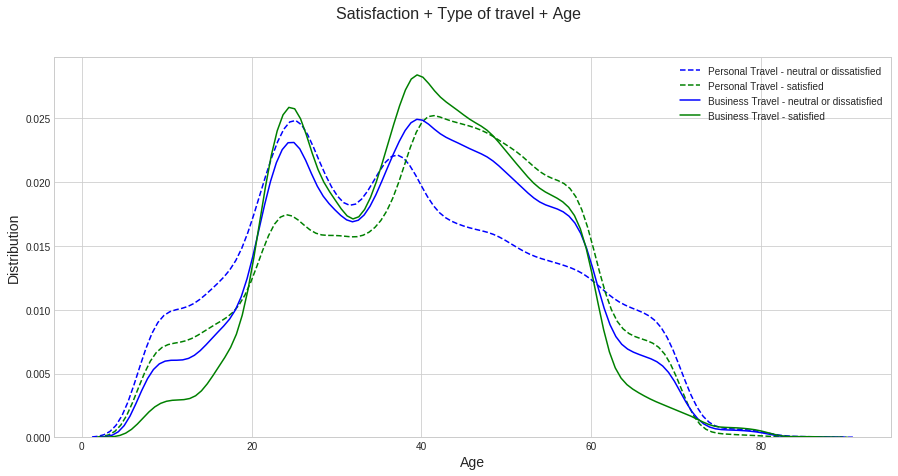

In [23]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Type of Travel'] == 'Personal Travel') , 'Age'], label="Personal Travel - neutral or dissatisfied", color='blue', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Type of Travel'] == 'Personal Travel'), 'Age'], label="Personal Travel - satisfied", color='green', linestyle='--');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'neutral or dissatisfied') | (df['Type of Travel'] != 'Personal Travel') , 'Age'], label="Business Travel - neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[(df['satisfaction'] == 'satisfied') | (df['Type of Travel'] != 'Personal Travel'), 'Age'], label="Business Travel - satisfied" , color='green');
fig.figure.suptitle("Satisfaction + Type of travel + Age", fontsize = 16)
plt.xlabel('Age', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

In General, looking at the "Age" distribution depending on different categorical features, we can say that the number of satisfied passengers has been growing since about 33 years old approximately. We can assume that this is due to the fact that adults fly business class more often, both on business travel (employers seldom buy young workers a business class ticket) and personal travel too (that the older a person is, the more affluent they are).

__Departure Delay in Minutes__

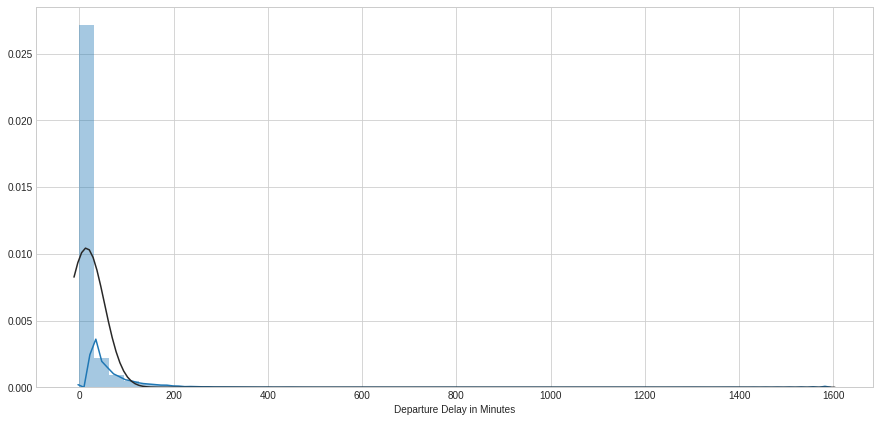

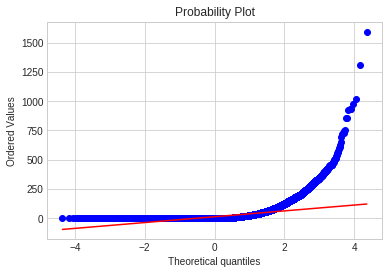

In [24]:
plt.figure(figsize = (15, 7))
sns.distplot(df['Departure Delay in Minutes'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Departure Delay in Minutes'], plot=plt)

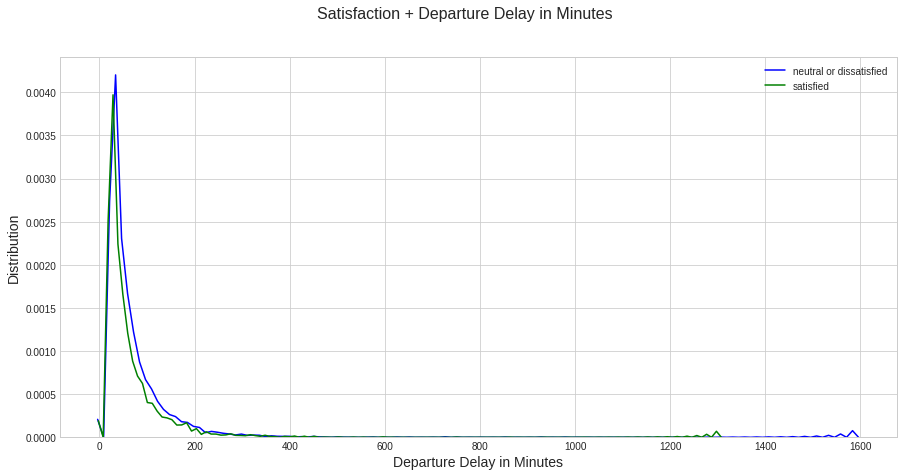

In [25]:
plt.figure(figsize = (15, 7))
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'Departure Delay in Minutes'], label="neutral or dissatisfied", color='blue');
fig = sns.kdeplot(df.loc[df['satisfaction'] == 'satisfied', 'Departure Delay in Minutes'], label="satisfied", color='green');
fig.figure.suptitle("Satisfaction + Departure Delay in Minutes", fontsize = 16);
plt.xlabel('Departure Delay in Minutes', fontsize=14);
plt.ylabel('Distribution', fontsize=14);

There is no big difference between satisfied and dissatisfied people here

__Inflight wifi service, Departure/Arrival time convenient,
       Ease of Online booking, Gate location, Food and drink,
       Online boarding, Seat comfort, Inflight entertainment,
       On-board service, Leg room service, Baggage handling,
       Checkin service, Inflight service, Cleanliness__

In [26]:
features_0_5 = num_features.drop(["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"])
features_0_5

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [27]:
for feature in features_0_5:
    print(feature, df[feature].unique())

Inflight wifi service [3 2 4 1 5 0]
Departure/Arrival time convenient [4 2 5 3 1 0]
Ease of Online booking [3 2 5 4 1 0]
Gate location [1 3 2 5 4 0]
Food and drink [5 1 2 4 3 0]
Online boarding [3 5 2 1 4 0]
Seat comfort [5 1 2 3 4 0]
Inflight entertainment [5 1 2 3 4 0]
On-board service [4 1 2 3 5 0]
Leg room service [3 5 4 2 1 0]
Baggage handling [4 3 5 1 2]
Checkin service [4 1 3 5 2 0]
Inflight service [5 4 3 1 2 0]
Cleanliness [5 1 2 3 4 0]


Almost all these features contain values from 0 to 5, so we can look at distribution one graph

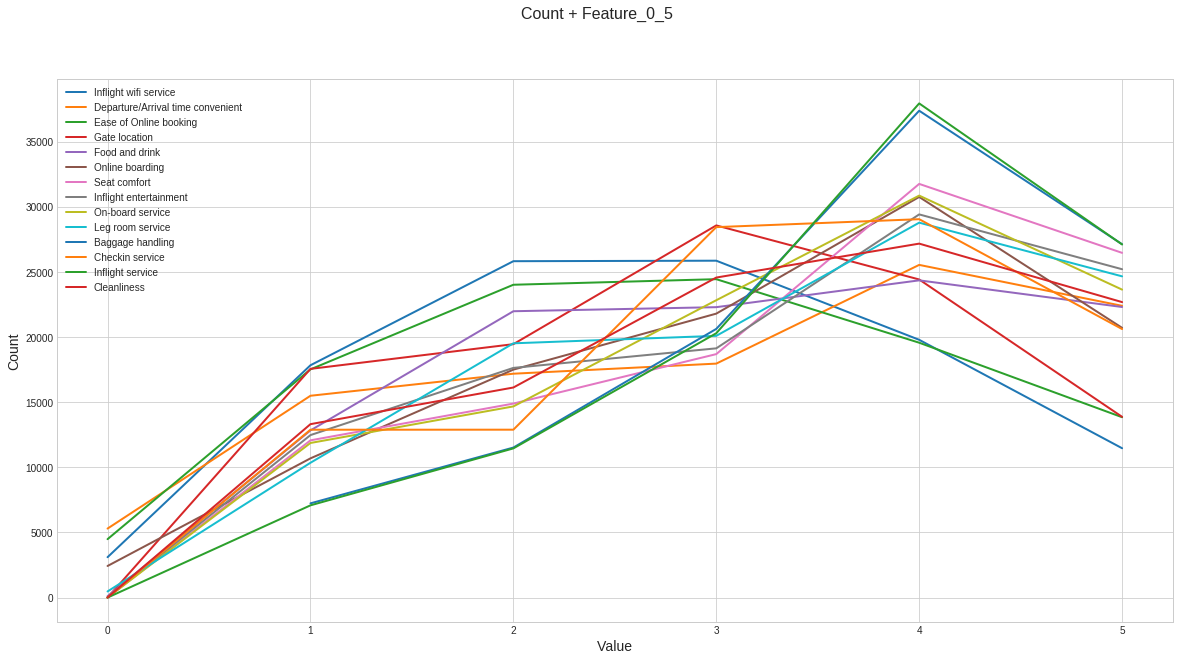

In [28]:
plt.figure(figsize = (20, 10))
for feature in features_0_5:    
    fig = sns.lineplot(data=df[feature].value_counts(sort=False), linewidth=2, label=feature)
fig.figure.suptitle("Count + Feature_0_5", fontsize = 16);
plt.xlabel('Value', fontsize=14);
plt.ylabel('Count', fontsize=14);

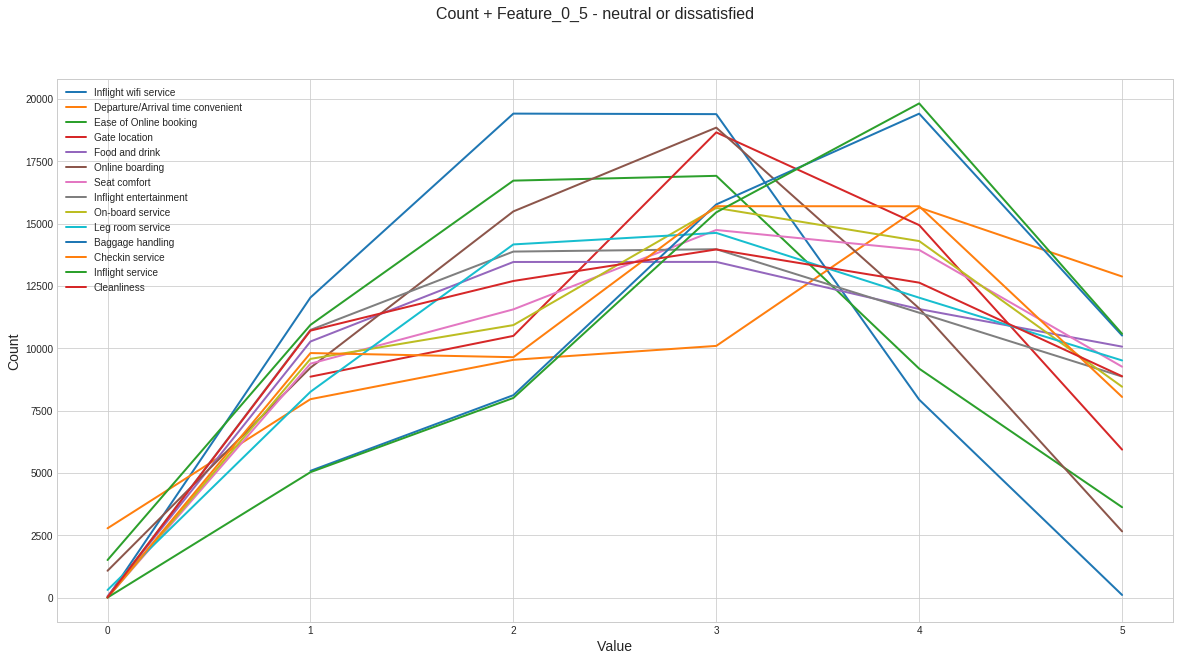

In [29]:
plt.figure(figsize = (20, 10))
for feature in features_0_5:    
    fig = sns.lineplot(data=df.loc[df['satisfaction'] == 'neutral or dissatisfied', feature].value_counts(sort=False), linewidth=2, label=feature)
fig.figure.suptitle("Count + Feature_0_5 - neutral or dissatisfied ", fontsize = 16);
plt.xlabel('Value', fontsize=14);
plt.ylabel('Count', fontsize=14);

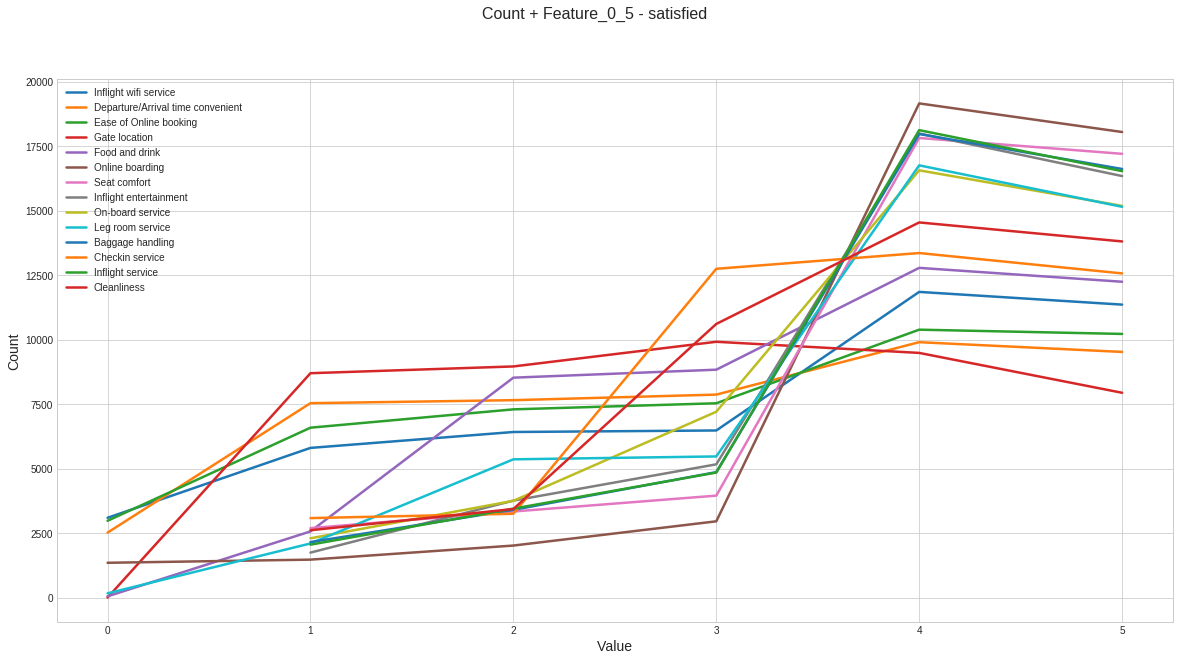

In [30]:
plt.figure(figsize = (20, 10))
for feature in features_0_5:    
    fig = sns.lineplot(data=df.loc[df['satisfaction'] != 'neutral or dissatisfied', feature].value_counts(sort=False), linewidth=2.5, label=feature)
fig.figure.suptitle("Count + Feature_0_5 - satisfied ", fontsize = 16);
plt.xlabel('Value', fontsize=14);
plt.ylabel('Count', fontsize=14);

We can conclude that there are more satisfied passengers with "4" and "5" values for all investigated features

## 5. Digitizing categorical features

To build predict models and analyze data (based on the kind of the target we can use logistic regression) using mathematics we need to digitize the target and categorical features.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64
On-board service                     103904 non-null int64


__Target__

In [32]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [33]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [34]:
df['satisfaction'].unique()

array([0, 1])

__Gender__

In [35]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
df['Gender'].replace({'Female': 0, 'Male': 1},inplace = True) # may the feminists forgive me  :)

In [37]:
df['satisfaction'].unique()

array([0, 1])

__Customer Type__

In [38]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [39]:
df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)

In [40]:
df['Customer Type'].unique()

array([1, 0])

__Type of Travel__

In [41]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [42]:
df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)

In [43]:
df['Type of Travel'].unique()

array([0, 1])

__Class__

In [44]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [45]:
ClassD = pd.get_dummies(df['Class'])
df = pd.concat([df, ClassD],axis =1)

In [46]:
df = df.drop('Class', axis=1)

In [47]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,1,13,0,460,3,4,3,1,5,...,3,4,4,5,5,25,0,0,0,1
1,1,0,25,1,235,3,2,3,3,1,...,5,3,1,4,1,1,0,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,...,3,4,4,4,5,0,1,1,0,0
3,0,1,25,1,562,2,5,5,5,2,...,5,3,1,4,2,11,0,1,0,0
4,1,1,61,1,214,3,3,3,3,4,...,4,4,3,3,3,0,1,1,0,0


## 6. PCA

The features describing the levels of satisfaction (from 0 to 5) can logically be divided into two groups - inflight and boarding. 
Let's use Principal Component Analysis, we can downgrade each group to two components and look at the differences between variances before and after the downgrade. 

__Inflight features__

In [48]:
features_0_5

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [49]:
num_features = df.columns.drop(["Gender", "Customer Type", "Type of Travel", "satisfaction", "Flight Distance", "Departure Delay in Minutes", "Age", "Business", "Eco", "Eco Plus"])
num_features

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [50]:
inflight_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Inflight service', 'Cleanliness']
inflight_features

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Seat comfort',
 'Inflight entertainment',
 'Inflight service',
 'Cleanliness']

__Boarding features__

In [51]:
boardinf_features = num_features.drop(inflight_features)
boardinf_features

Index(['Ease of Online booking', 'Gate location', 'Online boarding',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service'],
      dtype='object')

In [52]:
def reduce_dims(df, dims=2, method='pca'):
    
    assert method in ['pca', 'tsne'], 'Incorrect method'
    
    if method=='pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, learning_rate=250, random_state=42)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')
        
    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames) 

__Downgrade of inflight features__

In [53]:
dim_reducer2d, inflight_components_2d = reduce_dims(df[inflight_features], dims=2, method='pca')
inflight_components_2d.head(2)

,component_1,component_2
0,-3.546083,-0.568680
1,4.496308,0.016331


In [54]:
df[inflight_features].shape, inflight_components_2d.shape

((103904, 7), (103904, 2))

In [55]:
variance_after_inflight_features = np.var(inflight_components_2d, axis=0, ddof=1).sum()
variance_after_inflight_features

8.037307681697436

In [56]:
variance_after_inflight_features / variance_before_inflight_features

NameError: name 'variance_before_inflight_features' is not defined

In [57]:
inflight_components_2d

,component_1,component_2
0,-3.546083,-0.568680
1,4.496308,0.016331
2,-3.145646,1.725034
3,2.549738,-1.664934
4,-0.745613,0.143112
...,...,...
103899,2.891871,1.774140
103900,-1.792164,-1.438295
103901,-1.576131,2.759345
103902,4.878947,1.890345


__Downgrade of boarding features__

In [58]:
dim_reducer2d, boardinf_components_2d = reduce_dims(df[boardinf_features], dims=2, method='pca')
boardinf_components_2d.head(2)

,component_1,component_2
0,-0.172182,-1.247261
1,1.339489,1.143121


In [59]:
df[boardinf_features].shape, boardinf_components_2d.shape

((103904, 7), (103904, 2))

In [60]:
variance_after_boardinf_features = np.var(boardinf_components_2d, axis=0, ddof=1).sum()
variance_after_boardinf_features

6.203152612995989

In [61]:
variance_after_boardinf_features / variance_before_boardinf_features

NameError: name 'variance_before_boardinf_features' is not defined

In [62]:
boardinf_components_2d

,component_1,component_2
0,-0.172182,-1.247261
1,1.339489,1.143121
2,-0.765803,-0.886506
3,0.191434,2.803346
4,-0.984837,0.528642
...,...,...
103899,2.271992,0.061663
103900,-3.476675,-0.197756
103901,1.727209,-1.652427
103902,0.821322,-0.850130


__Making dataset with PCA components__

In [63]:
df_with_pca_components = df

In [64]:
df_with_pca_components['inflight_component_1'] = inflight_components_2d['component_1']

In [65]:
df_with_pca_components['inflight_component_2'] = inflight_components_2d['component_2']

In [66]:
df_with_pca_components['boarding_component_1'] = boardinf_components_2d['component_1']

In [67]:
df_with_pca_components['boarding_component_2'] = boardinf_components_2d['component_2']

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
Gender                               103904 non-null int64
Customer Type                        103904 non-null int64
Age                                  103904 non-null int64
Type of Travel                       103904 non-null int64
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64
On-board service                     103904 non-null int64
Leg room service                     103904 non-null int64
Bagg

## 7. Prediction

In [69]:
y = df['satisfaction']
X = df.drop('satisfaction', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/vadim/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     19334
           1       0.84      0.78      0.81     14955

    accuracy                           0.84     34289
   macro avg       0.84      0.83      0.83     34289
weighted avg       0.84      0.84      0.84     34289



array([[17040,  2294],
       [ 3282, 11673]])

In [72]:
y = df_with_pca_components['satisfaction']
X = df_with_pca_components.drop('satisfaction', axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [74]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/vadim/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     19334
           1       0.84      0.78      0.81     14955

    accuracy                           0.84     34289
   macro avg       0.84      0.83      0.83     34289
weighted avg       0.84      0.84      0.84     34289



array([[17040,  2294],
       [ 3282, 11673]])